In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Discretization parameters
dx = 0.01 # space
dt = 0.005 # time
a = 1

In [11]:
 
x_start = 0
x_end = 15+dx

_x = np.arange(x_start, x_end, dx)

delta_x_ = 1 # Interval of the "disturbance"
t_start = 0

In [12]:
def LFx2(u, dx, dt, boundary_conditions, a=1, n_steps=1):
    # Propagate the disturbance
    c = a*dt/dx
    lb = boundary_conditions[0]
    rb = boundary_conditions[1]
    u_prop = np.zeros((n_steps, len(u)))

    u_prop[0, :] = u
    
    for i in range(1, n_steps): # loop over time steps
        u_new = u_prop[i, :]
        # Assign boundary conditions
        u_new[0] = lb
        u_new[-1] = rb
        for j in range(1, len(u)-1):
            # Predictor step
            u_minus = (u[j] + u[j-1])/2 - (c/2)*(u[j] - u[j-1])
            u_plus = (u[j] + u[j+1])/2 - (c/2)*(u[j+1] - u[j])
            # Corrector step
            u_new[j] = (u_minus + u_plus)/2 - (c/2)*(u_plus - u_minus)
        u = u_new        


    return u_prop

In [13]:
def top_hat(x, x_start, width):
    # Top hat parametrization
    # 2     ___
    #      |   |
    # 1 ___|   |___
    #   0  1   2  3

    if x_start <= x <= x_start + width:
        return 2
    else:
        return 1

In [14]:
# Contact discontinuity through LFx2
u0 = 0
p0 = 1
# Top hat initial condition for density
rho0 = np.array([top_hat(x, 1, 1) for x in _x])

In [21]:
rho_sol = LFx2(rho0, dx, dt, [1, 1], a=a, n_steps=2000)


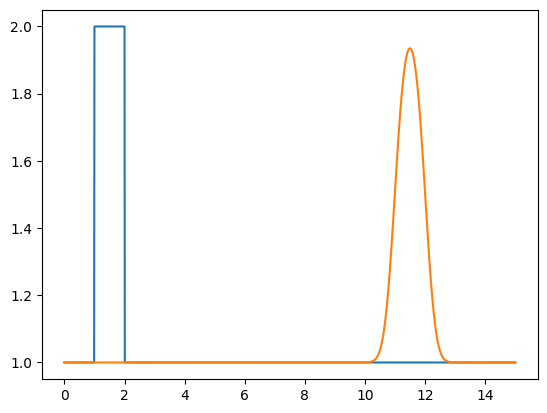

In [22]:
plt.plot(_x, rho0)
plt.plot(_x, rho_sol[-1, :])
plt.show()

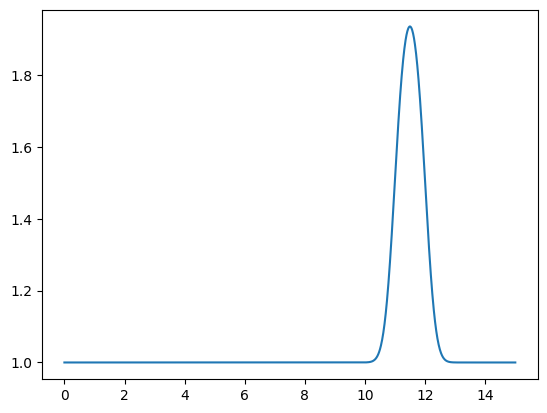

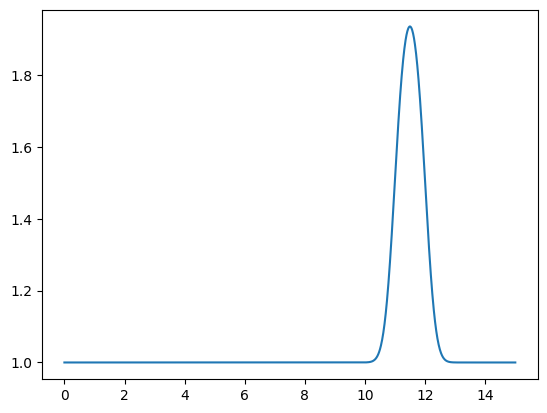